## Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json

## Data Preprocessing

### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set


<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 95.    99.   137.  ]
   [ 98.   102.   140.  ]
   [102.   106.   144.  ]
   ...
   [120.25 122.25 160.25]
   [124.5  126.5  164.5 ]
   [122.5  124.5  162.5 ]]

  [[ 94.75  98.75 136.75]
   [108.5  112.5  150.5 ]
   [112.5  116.5  154.5 ]
   ...
   [119.75 121.75 159.75]
   [124.   126.   164.  ]
   [118.75 120.75 158.75]]

  [[102.5  106.5  144.5 ]
   [ 96.   100.   138.  ]
   [ 92.25  96.25 134.25]
   ...
   [121.   123.   161.  ]
   [122.75 124.75 162.75]
   [117.5  119.5  157.5 ]]

  ...

  [[ 69.5   97.    41.5 ]
   [ 76.   100.5   47.  ]
   [ 74.5   97.    46.5 ]
   ...
   [113.   115.   153.  ]
   [112.25 114.25 152.25]
   [113.5  115.5  153.5 ]]

  [[ 87.25 112.25  54.25]
   [ 88.   111.5   54.5 ]
   [ 83.25 103.25  50.25]
   ...
   [117.75 119.75 157.75]
   [117.   119.   157.  ]
   [116.5  118.5  156.5 ]]

  [[ 83.   106.    50.  ]
   [ 85.   105.25  51.5 ]
   [ 81.75  99.75  49.25]
   ...
   [114.75 116.75 154.75]
   [116.   118.   156.  ]
   [115.   117.   15

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting,so increse number of neurons
3. Add more Convolution layer to extract more feature from images there may be possibility that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
  model = Sequential()

## Building Convolution Layer And Pooling Layer

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25)) #to avoid overfitting

In [14]:
model.add(Flatten()) # flattening

In [15]:
model.add(Dense(units=1500,activation='relu')) # adding dense layer

In [16]:
model.add(Dropout(0.4))

In [17]:
 model.add(Dense(units=38,activation='softmax')) #output layer

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])  # compiling model

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

## Model Training

In [41]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 2370s 1s/step - loss: 1.3153 - accuracy: 0.6115 - val_loss: 0.4642 - val_accuracy: 0.8526
Epoch 2/10
2197/2197 [==============================] - 1430s 651ms/step - loss: 0.4248 - accuracy: 0.8660 - val_loss: 0.3049 - val_accuracy: 0.8997
Epoch 3/10
2197/2197 [==============================] - 1425s 648ms/step - loss: 0.2675 - accuracy: 0.9144 - val_loss: 0.2185 - val_accuracy: 0.9309
Epoch 4/10
2197/2197 [==============================] - 1571s 715ms/step - loss: 0.1826 - accuracy: 0.9399 - val_loss: 0.1663 - val_accuracy: 0.9465
Epoch 5/10
2197/2197 [==============================] - 1420s 646ms/step - loss: 0.1386 - accuracy: 0.9545 - val_loss: 0.1996 - val_accuracy: 0.9399
Epoch 6/10
2197/2197 [==============================] - 1553s 707ms/step - loss: 0.1074 - accuracy: 0.9652 - val_loss: 0.1586 - val_accuracy: 0.9520
Epoch 7/10
2197/2197 [==============================] - 1556s 708ms/step - loss: 0.0890 - accuracy: 0.9712 - 

## Model Evaluation

### Model evaluation on training set

In [22]:
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 733s 333ms/step - loss: 0.0267 - accuracy: 0.9917


In [23]:
print(train_loss,train_acc)

0.02668759971857071 0.9916779398918152


### Model evaluation on validation set

In [24]:
val_loss,val_acc = model.evaluate(validation_set)

550/550 [==============================] - 118s 214ms/step - loss: 0.1198 - accuracy: 0.9649


In [25]:
print(val_loss,val_acc)

0.11983000487089157 0.9648873209953308


## Saving Model

In [52]:
model.save('trained_model.keras')

In [33]:
training_history.history

{'loss': [1.3152776956558228,
  0.4247700572013855,
  0.2674550414085388,
  0.1825951635837555,
  0.1385917067527771,
  0.1074451208114624,
  0.0890030562877655,
  0.07540646940469742,
  0.06597371399402618,
  0.05538470298051834],
 'accuracy': [0.6115086674690247,
  0.865993320941925,
  0.9143751263618469,
  0.9398819208145142,
  0.9545060396194458,
  0.965232253074646,
  0.9712212681770325,
  0.9754747748374939,
  0.9785617589950562,
  0.9821608662605286],
 'val_loss': [0.46424001455307007,
  0.3049488365650177,
  0.21845705807209015,
  0.16628630459308624,
  0.19960466027259827,
  0.1586070954799652,
  0.12310625612735748,
  0.14084292948246002,
  0.12105903029441833,
  0.11983000487089157],
 'val_accuracy': [0.8526064157485962,
  0.8997268676757812,
  0.9309127926826477,
  0.9465057849884033,
  0.9399043917655945,
  0.9520259499549866,
  0.9610744118690491,
  0.957773745059967,
  0.9644320607185364,
  0.9648873209953308]}

### Recording history in json

In [44]:
with open('training_history.json', 'w') as f:
    json.dump(training_history.history, f)

print("✅ Model and training history saved.")

✅ Model and training history saved.


In [6]:
# Load the saved training history from the JSON file
with open('training_history.json', 'r') as f:
    loaded_history = json.load(f)

print("✅ Training history loaded.")
class TrainingHistory:
    def __init__(self, history):
        self.history = history

    def __getattr__(self, name):
        if name == 'history':
            return self.history
        else:
            raise AttributeError(f"'{self.__class__.__name__}' object has no attribute '{name}'")
training_history = TrainingHistory(loaded_history)

✅ Training history loaded.


### Accuracy Visualization

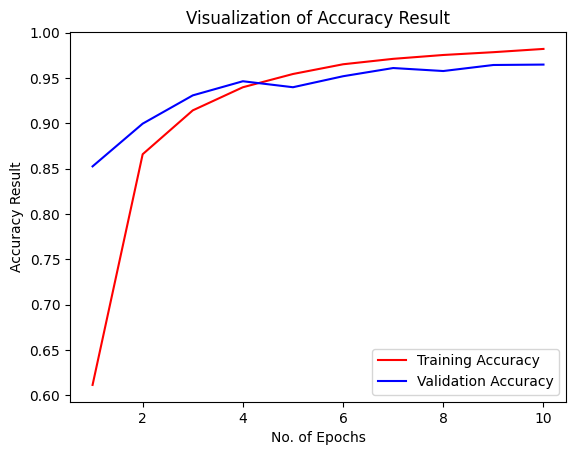

In [9]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.legend()
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.show()

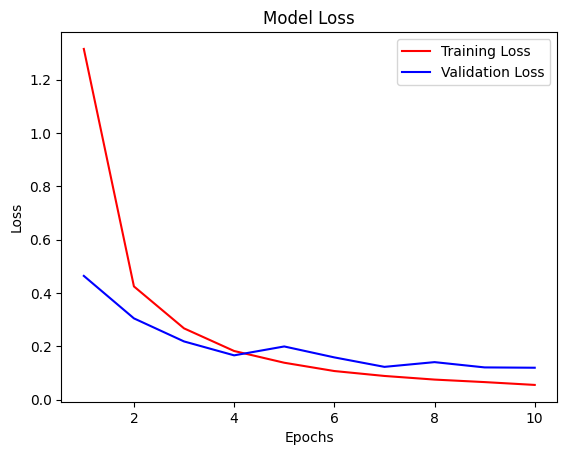

In [10]:
import matplotlib.pyplot as plt

epochs = [i for i in range(1, 11)]

plt.plot(epochs, training_history.history['loss'], color='red', label='Training Loss')
plt.plot(epochs, training_history.history['val_loss'], color='blue', label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss")
plt.legend()
plt.show()


In [13]:
model = tf.keras.models.load_model('trained_model.h5')

### Some other metrics for model evaluation

In [35]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [36]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [21]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('trained_model.h5')


In [37]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 [==============================] - 100s 182ms/step


(array([[9.9995017e-01, 3.3295881e-05, 2.2456131e-08, ..., 2.8288457e-12,
         3.8634571e-11, 8.1479379e-11],
        [9.9999702e-01, 5.1698782e-07, 1.6114089e-11, ..., 1.6726060e-14,
         6.9143103e-14, 6.9751754e-14],
        [9.9999774e-01, 2.2511472e-06, 4.5756248e-09, ..., 4.2020729e-17,
         8.2294577e-13, 1.0624125e-12],
        ...,
        [8.5988989e-15, 1.5554025e-15, 2.9584217e-11, ..., 2.6274816e-16,
         2.3738236e-15, 1.0000000e+00],
        [1.9537625e-13, 9.0707530e-15, 2.7349553e-11, ..., 1.2711405e-14,
         1.5104239e-14, 1.0000000e+00],
        [4.4195449e-18, 1.0744519e-17, 1.6029461e-16, ..., 1.2176324e-20,
         1.9682071e-17, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [38]:
predicted_categories = tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [39]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [40]:
 y_true = tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [42]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.1 MB 2.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/11.1 MB 2.9 MB/s eta 0:00:04
   ------ --------------------------------- 1.8/11.1 MB 2.8 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.1 MB 2.8 MB/s eta 0:00:04
   ---------- ----------------------------- 2.9/11.1 MB 2.5 MB/s eta 0:00:04
   ------------ --------------------------- 3.4/11.1 MB 2.5 MB/s eta 0:00:04
   -------------- ------------------------- 3.9/11.1 MB 2.5 MB/s eta 0:00:03
   ---------------- ----------------------- 4.5/11.1 MB 2.5 MB/s eta 0:00:03
   ----------------- ---------------------- 5.0/11.1 MB 2.6 MB/s eta 0:00:03
   ------------------- -------------------- 5.5/11.1 MB 2.5 MB/s eta 0:00:03
   ---------------------- ----------------- 6.3/11.1 MB 2.6 MB/s eta 0:00:02
   ----------

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.93      0.96       504
                                 Apple___Black_rot       0.94      1.00      0.97       497
                          Apple___Cedar_apple_rust       0.99      0.97      0.98       440
                                   Apple___healthy       0.95      0.96      0.96       502
                               Blueberry___healthy       0.92      0.99      0.95       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.97      0.99       421
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.90      0.92       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.97      0.

In [48]:
cm = confusion_matrix(y_true,predicted_categories)
cm,cm.shape

(array([[469,  11,   0, ...,   0,   0,   0],
        [  0, 495,   0, ...,   0,   0,   0],
        [  0,   1, 428, ...,   1,   0,   1],
        ...,
        [  0,   0,   0, ..., 490,   0,   0],
        [  0,   0,   0, ...,   0, 446,   0],
        [  0,   0,   0, ...,   0,   0, 474]], dtype=int64),
 (38, 38))

### Confusion Matrix Visualisation

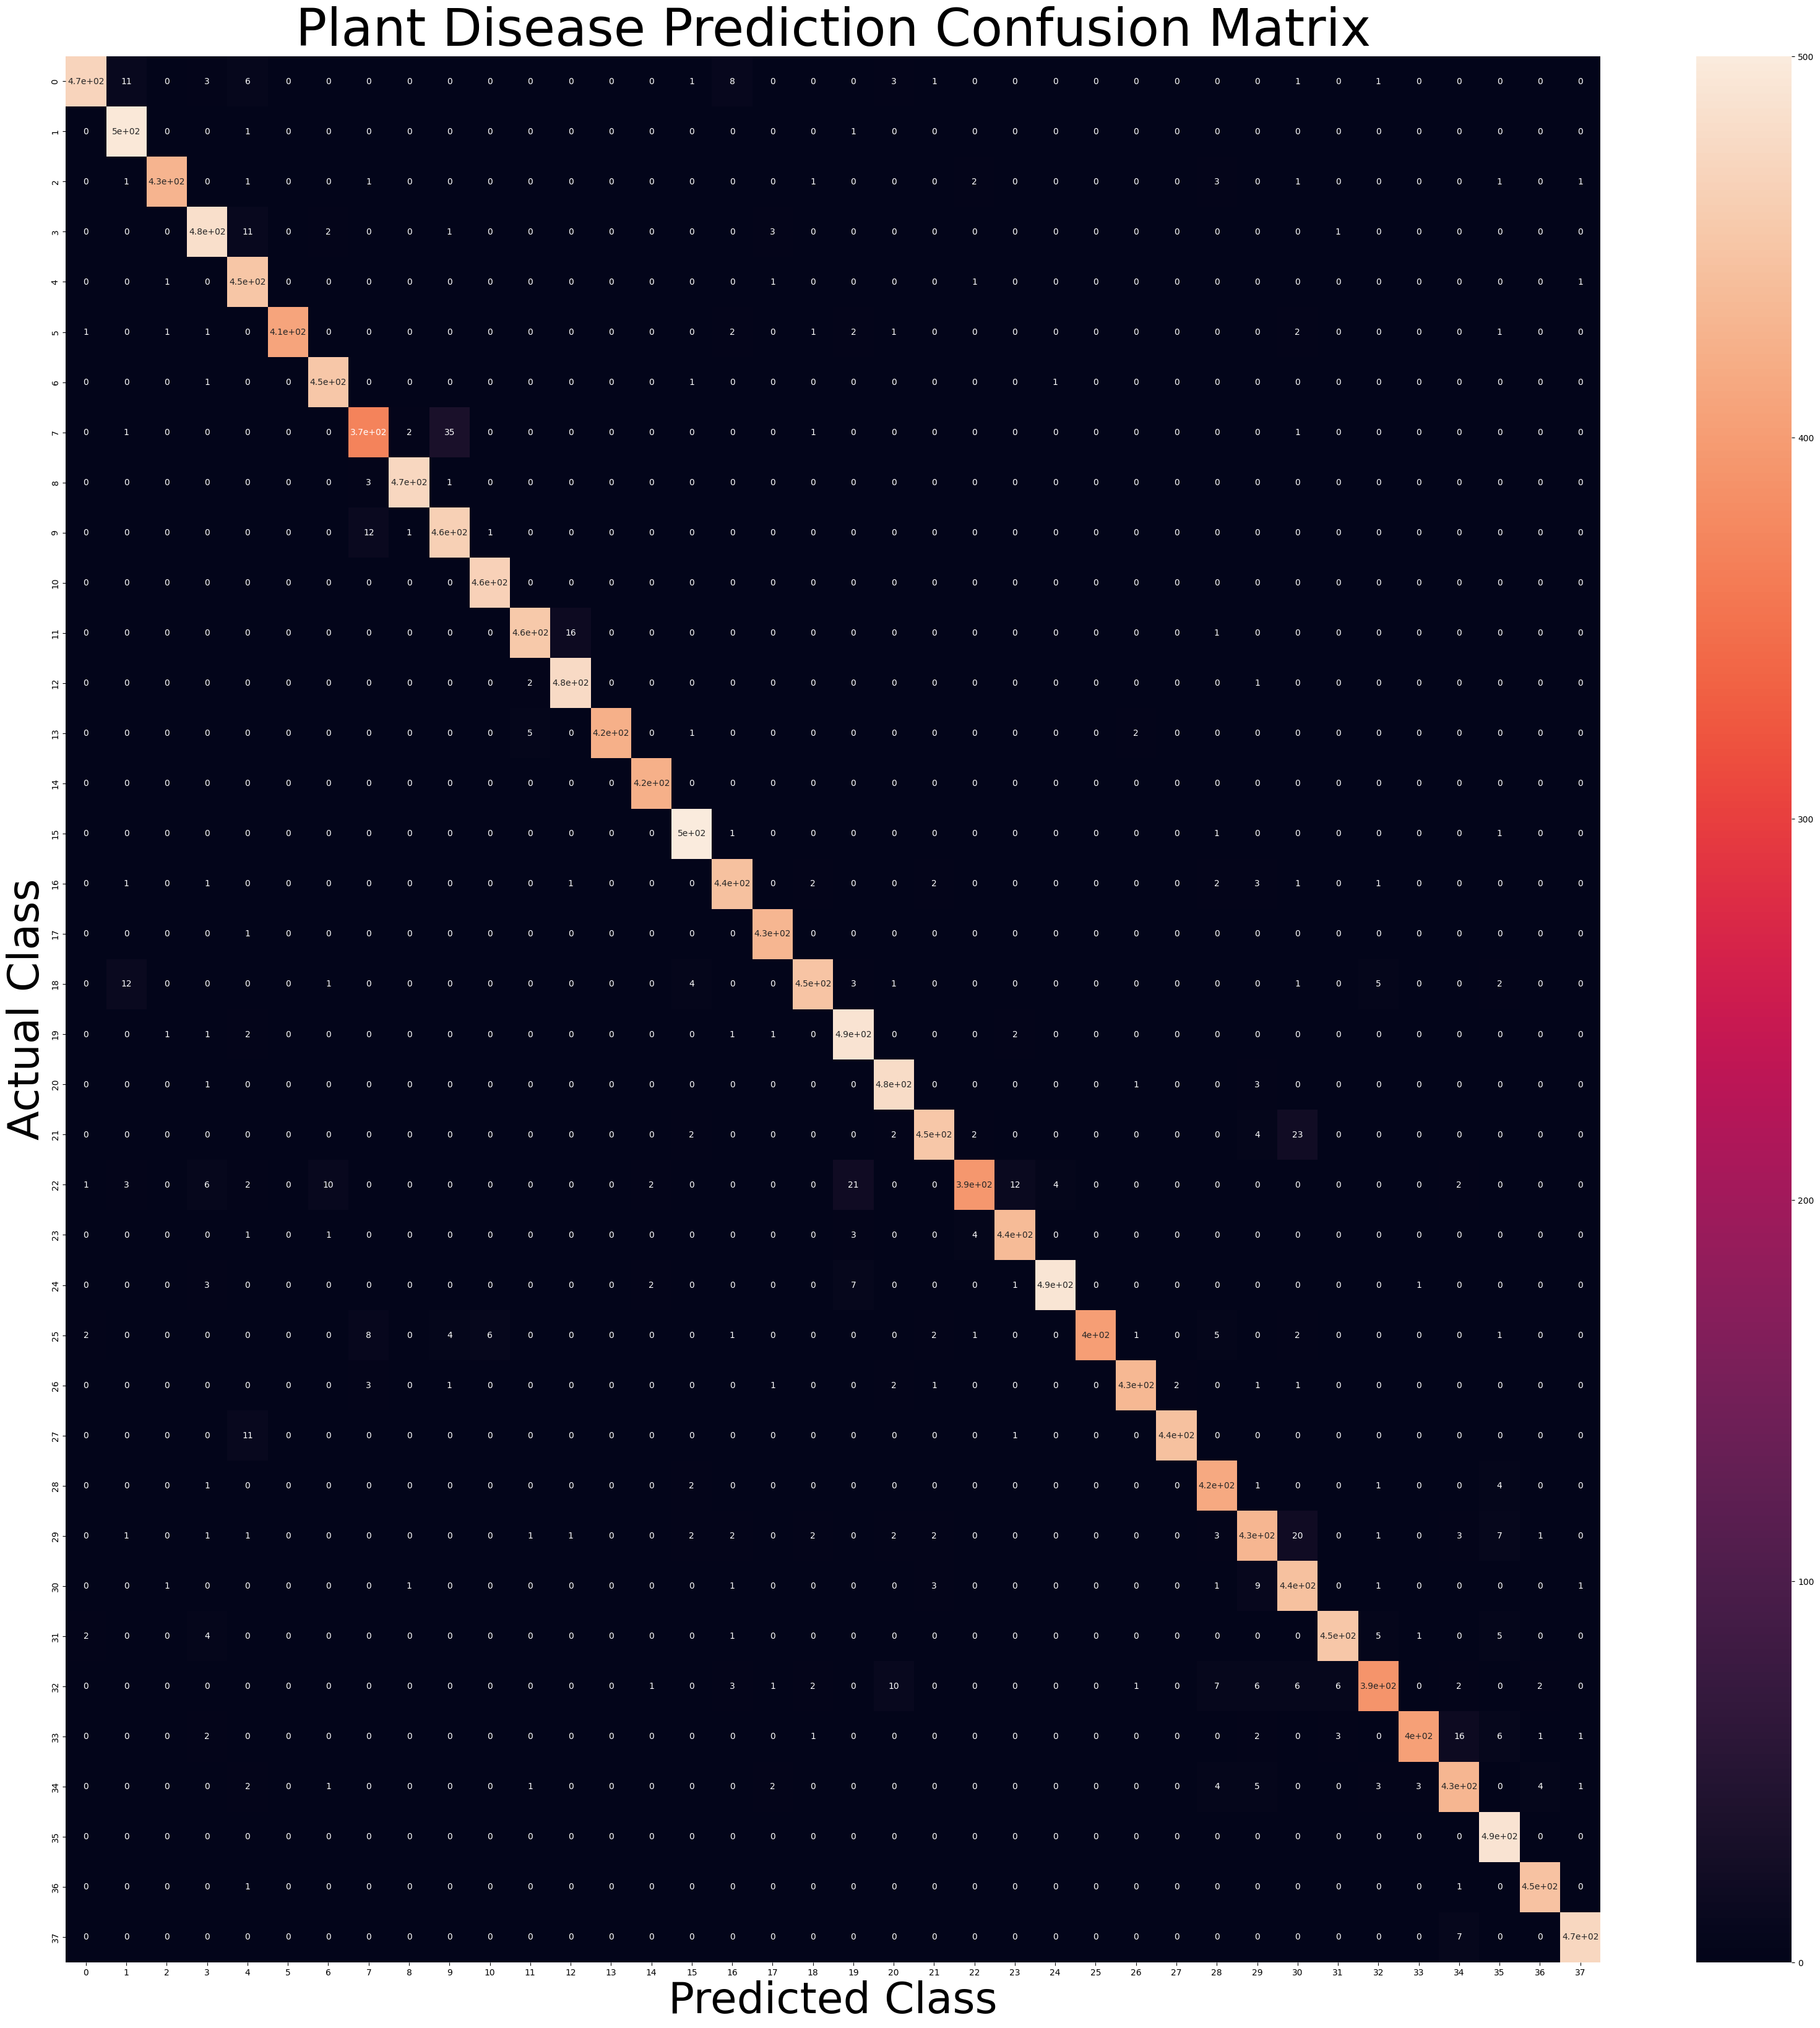

In [57]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel('Predicted Class',fontsize=50)
plt.ylabel('Actual Class',fontsize=50)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=60)
plt.show()